In [28]:
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np

In [3]:
from sklearn import datasets

In [13]:
iris = datasets.load_iris()
X = iris.data[:, :]  # we only take the first two features.
y = iris.target
features = iris.feature_names

In [14]:
X.shape, y.shape, features

((150, 4),
 (150,),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [19]:
dataset = pd.DataFrame(np.concatenate([X,np.expand_dims(y,1)],axis=1),columns = features+['class'] )

In [20]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [21]:
print(dataset.describe())

       sepal length (cm)  sepal width (cm)  ...  petal width (cm)       class
count         150.000000        150.000000  ...        150.000000  150.000000
mean            5.843333          3.057333  ...          1.199333    1.000000
std             0.828066          0.435866  ...          0.762238    0.819232
min             4.300000          2.000000  ...          0.100000    0.000000
25%             5.100000          2.800000  ...          0.300000    0.000000
50%             5.800000          3.000000  ...          1.300000    1.000000
75%             6.400000          3.300000  ...          1.800000    2.000000
max             7.900000          4.400000  ...          2.500000    2.000000

[8 rows x 5 columns]


In [22]:
print(dataset.groupby('class').size())

class
0.0    50
1.0    50
2.0    50
dtype: int64


<function matplotlib.pyplot.show>

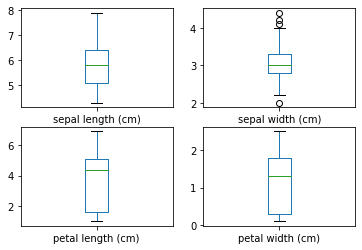

In [29]:
dataset[features].plot(kind='box',subplots = True, layout = (2,2),sharex=False,sharey=False)
plt.show

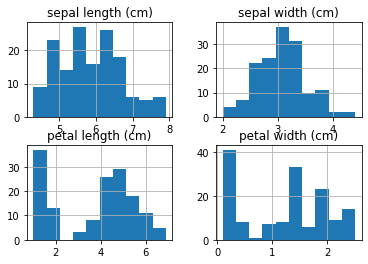

In [32]:
dataset[features].hist(layout = (2,2))
plt.show()

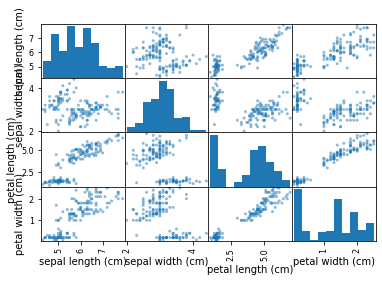

In [33]:
scatter_matrix(dataset[features])
plt.show()

In [40]:
validation_size = 0.2
seed = 7
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=validation_size,random_state=seed)

In [37]:
models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class = 'ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))
models.append(('SVM',SVC(gamma='auto')))
results =[]
names = []
for name, model in models:
  kfold = KFold(n_splits=10,random_state=seed,shuffle = True)
  cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s : %f (%f) "%(name,cv_results.mean(),cv_results.std())
  print(msg)

LR : 0.958333 (0.055902) 
LDA : 0.975000 (0.038188) 
KNN : 0.983333 (0.033333) 
CART : 0.950000 (0.076376) 
NB : 0.966667 (0.040825) 
SVM : 0.991667 (0.025000) 


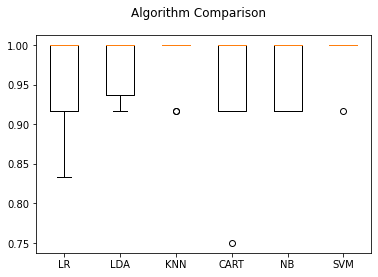

In [39]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [41]:
svm = SVC(gamma = 'auto')
svm.fit(X_train,y_train)
predictions = svm.predict(X_valid)
print(accuracy_score(y_valid,predictions))
print(confusion_matrix(y_valid,predictions))
print(classification_report(y_valid,predictions))


0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.83      0.91        12
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

